# Analiza skupa podataka: Body signal of smoking

Cilj je da se na osnovu bio-signala utvrdi da li je osoba pusac.

Tacna identifikacija pušača i nepušača omogucava tacnije i preciznije proučavanje uticaja pušenja na zdravstvene ishode. 
Ocigledno je važnije ispravno identfikovati pušače nego nepušače, jer su zdravstveni rizici povezani s pušenjem puno veći od rizika povezanih s nepušenjem. Medjutim, takodje je vazno smanjiti broj pogresno klasifikovanih nepusaca kao pusaca jer to moze imati negativne posledice poput stisanja pojedinaca koji ne puše.

Skup se sastoji od 55692 reda i narednih 27 atributa:

    ID : index
    gender
    age : 5-years gap
    height(cm)
    weight(kg)
    waist(cm) : Waist circumference length
    eyesight(left)
    eyesight(right)
    hearing(left)
    hearing(right)
    systolic : Blood pressure
    relaxation : Blood pressure
    fasting blood sugar
    Cholesterol : total
    triglyceride
    HDL : cholesterol type
    LDL : cholesterol type
    hemoglobin
    Urine protein
    serum creatinine
    AST : glutamic oxaloacetic transaminase type
    ALT : glutamic oxaloacetic transaminase type
    Gtp : γ-GTP
    oral : Oral Examination status
    dental caries
    tartar : tartar status
    smoking


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

Ucitavanje i analiza skupa podataka:

In [2]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/smoking.csv")
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [3]:
data.shape

(55692, 27)

In [4]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Rad sa nedostajucim vrednostima:

In [5]:
data.isna().any().any()

False

In [6]:
data.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

Zakljucujemo da u skupu nema nedostajucih vrednosti.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

Histogram raspodele nekih atributa:

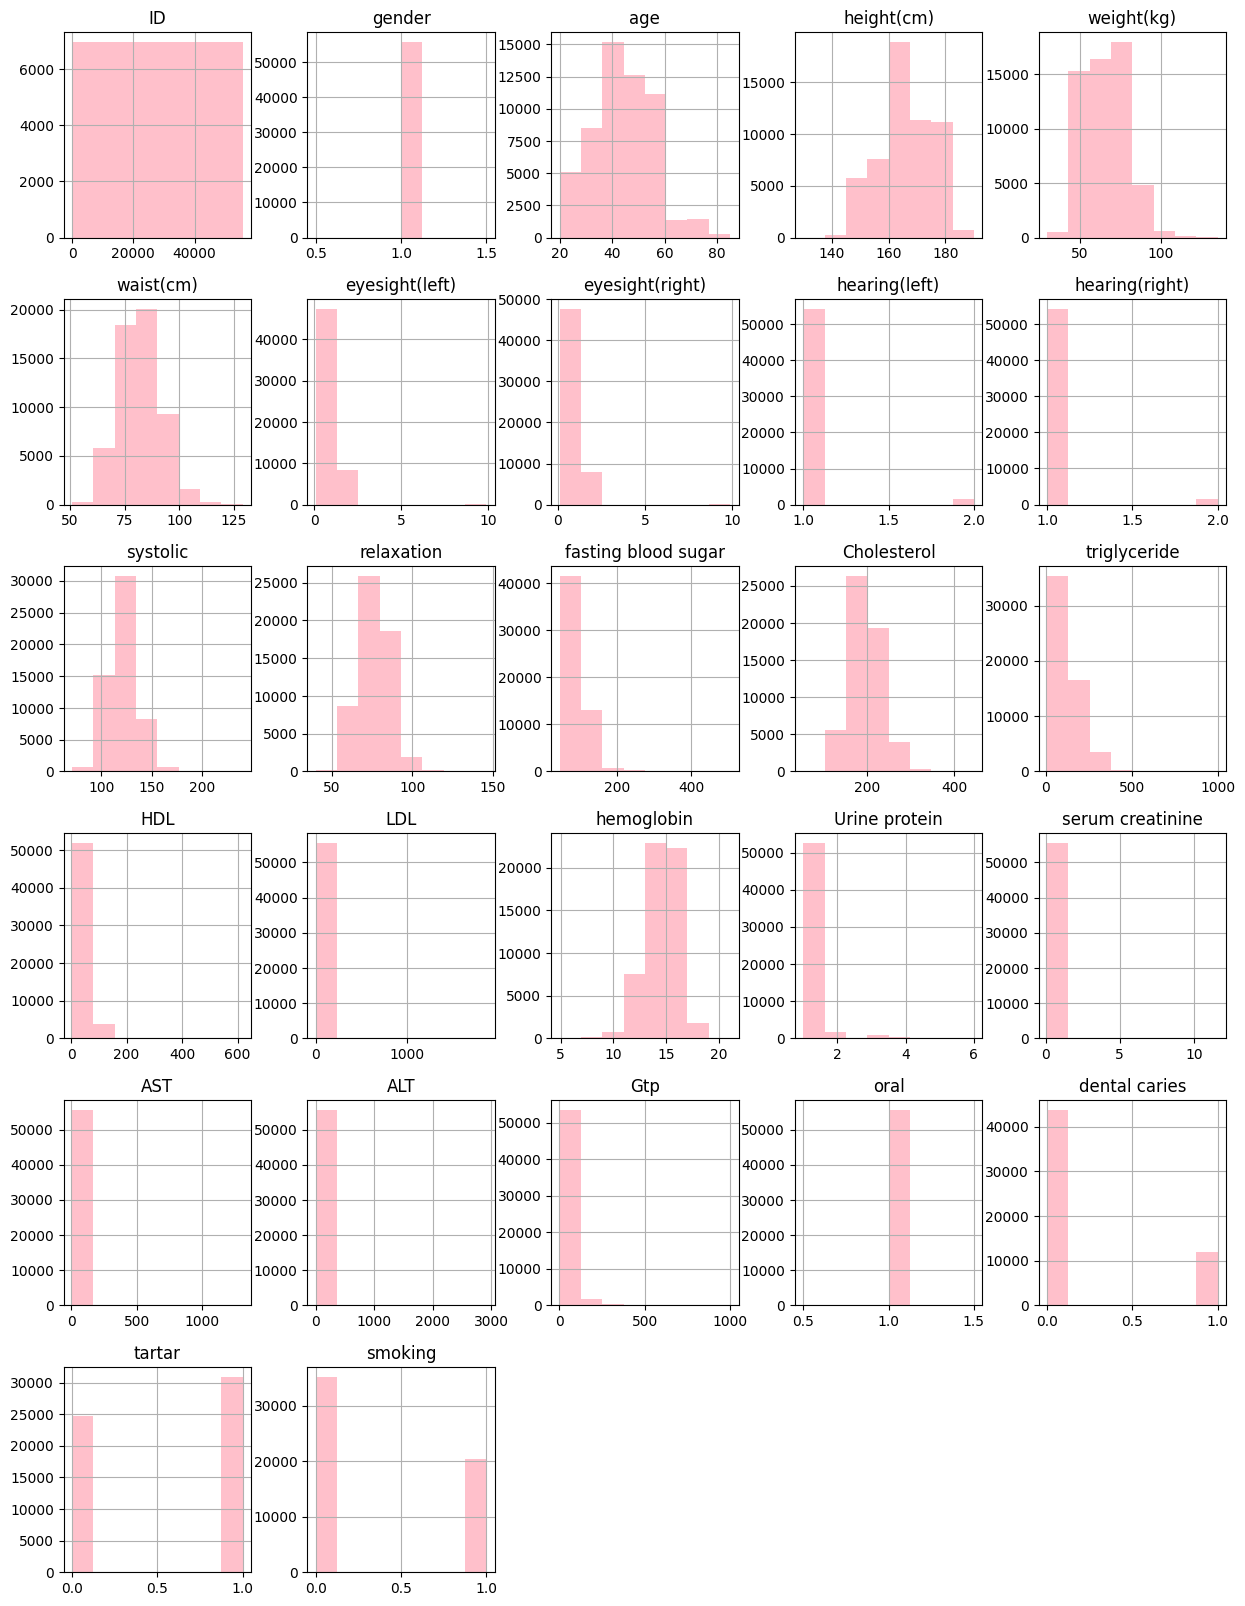

In [23]:
h=pd.DataFrame.hist(data, figsize = (15,20), column = data.columns[:], color="pink", bins=8, xlabelsize=10, ylabelsize=10)

Mozemo videti da imamo tri kategoricka atributa: gender, oral i tartar. Preslikacemo ih u binarne.

In [8]:
oral = data['oral'].unique()
gender = data['gender'].unique()
tartar = data['tartar'].unique()
gender, oral, tartar

(array(['F', 'M'], dtype=object),
 array(['Y'], dtype=object),
 array(['Y', 'N'], dtype=object))

In [9]:
data['oral'] = data['oral'].replace("Y", 1)
data['gender'] = data['gender'].replace("F", 1)
data['gender'] = data['gender'].replace("M", 1)
data['tartar'] = data['tartar'].replace("Y", 1)
data['tartar'] = data['tartar'].replace("N", 0)

Kako je nas skup podataka veliki, tesko je da uocimo odnose izmedju atributa. Zato koristimo dijagram korelacije koji nam pruza vizuelni rezime.

Text(0.5, 1.0, 'Correlation Plot')

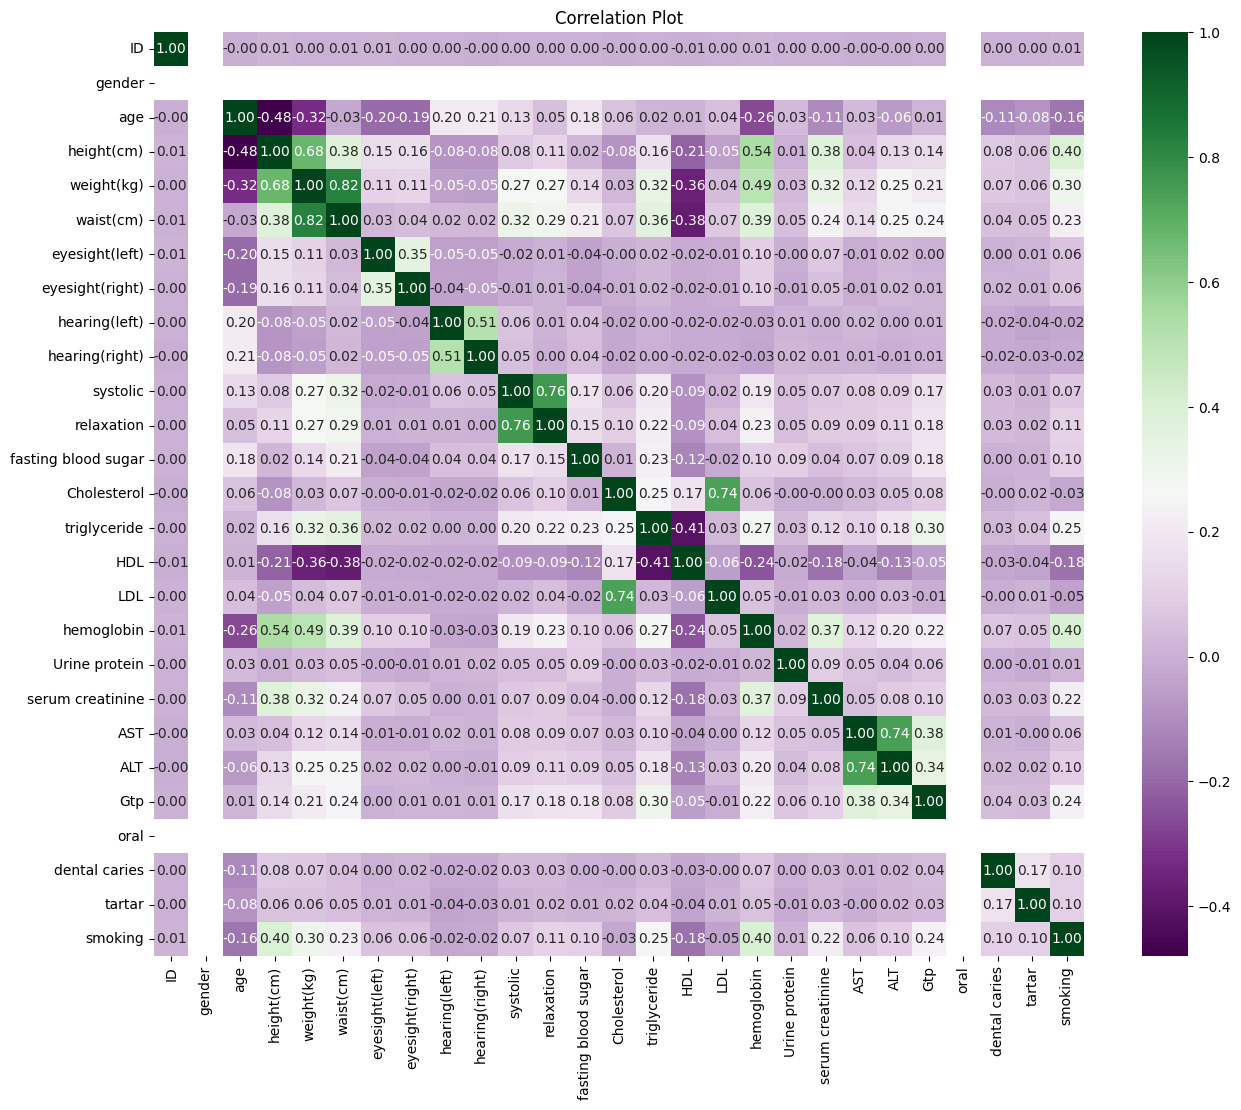

In [10]:
plt.figure(figsize=(15,12))

sns.heatmap(data.corr(), annot=True, cmap='PRGn', fmt='.2f',)
plt.title('Correlation Plot')

Vidimo da postoje atributi koji su dosta povezani sa drugima. Neki od njih su:

    gender |-> height,weight,waist,hemoglobin
    height |-> gender,weight,hemoglobin,
    weight |-> gender,weight,waist,hemoglobin
    eyesight_left |-> eyesight_right i obrnuto
    systolic |-> relaxation i obrnuto
    cholesterol |-> ldl i obrnuto
    ast |-> alt i obrnuto

Podela na ulazne i ciljne atribute: (Informacije o tome da li je osoba pusac se nalaze u koloni smoking sto predstavlja ciljni atrinut. Ostali atributi se koriste za predikciju - ulazni atributi)

In [11]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1
1,1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1
4,4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0


In [12]:
Y.unique()

array([0, 1])

Klasa Y ima vrednosti 0 i 1 sto znaci da resavamo problem binarne klasifikacije.

Provera balansiranosti klasa:


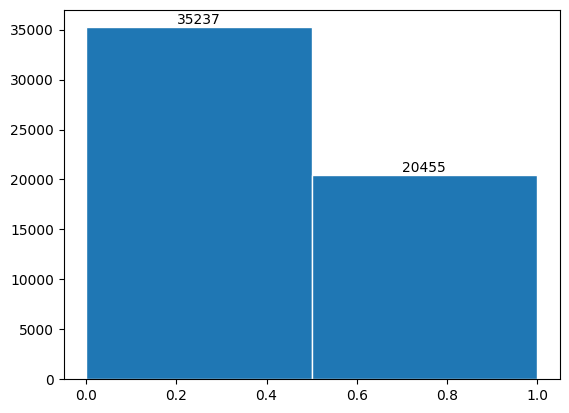

In [13]:
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             
               xytext = (0,0.2),             
               textcoords = "offset points", 
               ha = 'center', va = 'bottom',
               )

plt.show()


Na osnovu histograma vidimo da se u skupu nalazi 35237 osoba koje nisu pusaci i 20455 osoba koje jesu pusaci. Primecujemo blagu nebalansiranost.

Analiza ulaznih atributa i podela na test i trening skup:


In [24]:
X.describe()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
count,55692.000000,55692.0,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.0,55692.000000,55692.000000
mean,27845.500000,1.0,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,...,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,1.0,0.213334,0.555556
std,16077.039933,0.0,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,...,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.0,0.409665,0.496908
min,0.000000,1.0,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,1.0,0.000000,0.000000
25%,13922.750000,1.0,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,...,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,1.0,0.000000,0.000000
50%,27845.500000,1.0,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,...,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,1.0,0.000000,1.000000
75%,41768.250000,1.0,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,...,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,1.0,0.000000,1.000000
max,55691.000000,1.0,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,...,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.0,1.000000,1.000000


Koristicemo stratifikovano uzorkovanje kako bismo osigurali približno isti broj nepušača i pušača u svakom skupu.
33% skupa cemo koristiti za testiranje, a 77% za treniranje.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state=12)